In [1]:
import wandb
import numpy as np
import sys
import torch
import torch.utils.data as Data
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import torch.nn as nn
import glob
import xarray as xr
import matplotlib.pyplot as plt
import os


BASE = '/scratch/ab10313/pleiades/'
PATH_NN= BASE+'NN_data_1_4/'
save_path=BASE+"trained_models"


import submeso_ml.systems.regression_system as regression_system
import submeso_ml.models.fcnn as fcnn
import submeso_ml.data.dataset as dataset



In [2]:
# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')

CUDA Not Available


In [3]:
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR',  'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'])

test_loader_winter=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_winter_ind),
    sampler=submeso_dataset.test_winter_ind)

test_loader_summer=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_summer_ind),
    sampler=submeso_dataset.test_summer_ind)

test_loader=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)

/ext3/miniconda3/lib/python3.9/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#seasonality
model_winter = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_winter_res_1_4.pt')
model_summer = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_summer_res_1_4.pt')
model= torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_res_1_4_tmp.pt')

In [6]:
# data loader loc 0
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=0)

test_loader_loc_0=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 1
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=1)

test_loader_loc_1=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 2
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=2)

test_loader_loc_2=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 3
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=3)

test_loader_loc_3=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 4
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=4)

test_loader_loc_4=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)



# data loader loc 5
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=5)

test_loader_loc_5=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 6
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=6)

test_loader_loc_6=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 7
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=7)

test_loader_loc_7=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)



# data loader loc 8
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=8)

test_loader_loc_8=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 9
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=9)

test_loader_loc_9=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)

In [7]:
# data loader loc 10
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=10)

test_loader_loc_10=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader loc 11
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR' , 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], loc_num=11)

test_loader_loc_11=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)

In [8]:
# load trained models
model_loc_0 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_0_res_1_4.pt')
model_loc_1 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_1_res_1_4.pt')
model_loc_2 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_2_res_1_4.pt')
model_loc_3 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_3_res_1_4.pt')
model_loc_4 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_4_res_1_4.pt')
model_loc_5 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_5_res_1_4.pt')
model_loc_6 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_6_res_1_4.pt')
model_loc_7 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_7_res_1_4.pt')
model_loc_8 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_8_res_1_4.pt')
model_loc_9 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_9_res_1_4.pt')
model_loc_10 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_10_res_1_4.pt')
model_loc_11 = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_m_loc_11_res_1_4.pt')


In [9]:
PATH_LIST_full = glob.glob(BASE+'*_smooth/preprcossed_data/')

In [10]:
PATH_LIST_full

['/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/12_agulhas_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/11_new_zealand_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/08_kuroshio_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/10_north_pacific_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/01_gulf_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/03_south_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/05_argentina_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/13_australia_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/06_california_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/14_indian_ocean_smooth/preprcossed_data/']

In [11]:
label_list = ['Arabian Sea','Agulhas Current', 'New Zealand', 'Kuroshio Current', 'North Pacific', 'Equatorial Atlantic',
              'Gulf Stream', 'South Atlantic', 'Malvinas Current', 'South Pacific','California Current', 'Indian Ocean', ]

In [12]:
for x_data, y_data in test_loader_winter:
    prediction_winter = model_winter(x_data.to(device)).detach().numpy() 
    target_winter = y_data.detach().numpy()
    

for x_data, y_data in test_loader_summer:
    prediction_summer = model_summer(x_data.to(device)).detach().numpy() 
    target_summer = y_data.detach().numpy()
    
for x_data, y_data in test_loader:
    prediction = model(x_data.to(device)).detach().numpy() 
    target = y_data.detach().numpy()

In [13]:
# prediction and target of each model

# loc 0 
for x_data, y_data in test_loader_loc_0:
    prediction_loc_0 = model_loc_0(x_data.to(device)).detach().numpy() 
    target_loc_0 = y_data.detach().numpy()
    
# loc 1 
for x_data, y_data in test_loader_loc_1:
    prediction_loc_1 = model_loc_1(x_data.to(device)).detach().numpy() 
    target_loc_1 = y_data.detach().numpy()
    
    
    # loc 2 
for x_data, y_data in test_loader_loc_2:
    prediction_loc_2 = model_loc_2(x_data.to(device)).detach().numpy() 
    target_loc_2 = y_data.detach().numpy()
    
    
    # loc 3 
for x_data, y_data in test_loader_loc_3:
    prediction_loc_3 = model_loc_3(x_data.to(device)).detach().numpy() 
    target_loc_3 = y_data.detach().numpy()
    
    
    # loc 4 
for x_data, y_data in test_loader_loc_4:
    prediction_loc_4 = model_loc_4(x_data.to(device)).detach().numpy() 
    target_loc_4 = y_data.detach().numpy()
    
    
    # loc 5 
for x_data, y_data in test_loader_loc_5:
    prediction_loc_5 = model_loc_5(x_data.to(device)).detach().numpy() 
    target_loc_5 = y_data.detach().numpy()
    
    
    # loc 6 
for x_data, y_data in test_loader_loc_6:
    prediction_loc_6 = model_loc_6(x_data.to(device)).detach().numpy() 
    target_loc_6 = y_data.detach().numpy()
    
    
    # loc 7 
for x_data, y_data in test_loader_loc_7:
    prediction_loc_7 = model_loc_7(x_data.to(device)).detach().numpy() 
    target_loc_7 = y_data.detach().numpy()
    
    
    # loc 8 
for x_data, y_data in test_loader_loc_8:
    prediction_loc_8 = model_loc_8(x_data.to(device)).detach().numpy() 
    target_loc_8 = y_data.detach().numpy()
    
    
    # loc 9 
for x_data, y_data in test_loader_loc_9:
    prediction_loc_9 = model_loc_9(x_data.to(device)).detach().numpy() 
    target_loc_9 = y_data.detach().numpy()
    
    
    # loc 10 
for x_data, y_data in test_loader_loc_10:
    prediction_loc_10 = model_loc_10(x_data.to(device)).detach().numpy() 
    target_loc_10 = y_data.detach().numpy()
    
    
    # loc 11 
for x_data, y_data in test_loader_loc_11:
    prediction_loc_11 = model_loc_11(x_data.to(device)).detach().numpy() 
    target_loc_11 = y_data.detach().numpy()

In [14]:
# Physics based-paramerization
WB_FK = np.load(PATH_NN+'WB_FK08_param.npy')
test_ind_WB = submeso_dataset.test_ind#[submeso_dataset.test_ind<8450]

drF = np.load(PATH_NN+'drF.npy')
Lf_BD23 = np.load(PATH_NN+'Lf_Bodner_23.npy')
Lf_FK11 = np.load(PATH_NN+'Lf_FK_11.npy')

WB_FK_param = 0.07*WB_FK[test_ind_WB]
WB_FK_param_Lf_FK = 0.07*(drF[test_ind_WB]/np.maximum(Lf_FK11[test_ind_WB],5000))*WB_FK[test_ind_WB]
WB_FK_param_Lf_BD = 0.07*(drF[test_ind_WB]/Lf_BD23[test_ind_WB])*WB_FK[test_ind_WB]

# prediction and target by location

In [15]:
# NOTE on MSE vs R^2
# because this the JFM data is subspamled and so is the location in dex, I assume a variance of 1 which is true for the full normalized datasets,
# Then the R^2 = 1- MSE rather than using the r2_score function which uses the variance of the subsetted data

baseline_mse =  np.mean((target.flatten() - target.mean()) ** 2)

In [16]:
mean_tile_summer = np.transpose(np.tile(prediction_summer,(40,40,1)))
std_tile_summer = np.transpose(np.tile(prediction_summer,(40,40,1)))

In [17]:

#locations
location_index = np.zeros(846*12)
location_month_index= np.zeros(846*12)


for i in range(12):
    for j in range(846):
        location_index[i*846+j] = i
        location_month_index[i*846+j] = np.floor(j/60)


In [18]:
WB_sg_load= np.load(PATH_NN+'WB_sg.npy')
WB_sg_mean = np.load(PATH_NN+'WB_sg_mean.npy')
WB_sg_std = np.load(PATH_NN+'WB_sg_std.npy')
WB_FK = np.load(PATH_NN+'WB_FK08_param.npy')

In [19]:
# renormalize using mean and std 
# SORT test_ind for timeseries
test_ind = submeso_dataset.test_ind
summer_ind = submeso_dataset.test_summer_ind
winter_ind = submeso_dataset.test_winter_ind

mean_tile = np.tile(WB_sg_mean,(2030,1,40,40))
std_tile = np.tile(WB_sg_std,(2030,1,40,40))

mean_tile_summer = np.tile(WB_sg_mean,(summer_ind.size,1,40,40))
std_tile_summer = np.tile(WB_sg_std,(summer_ind.size,1,40,40))

mean_tile_winter = np.tile(WB_sg_mean,(winter_ind.size,1,40,40))
std_tile_winter = np.tile(WB_sg_std,(winter_ind.size,1,40,40))


# cell size 
drF_test = drF[test_ind] 
drF_test_loc = np.empty((12,2030,40,40))
drF_test_loc[:] = np.nan

# cell size 
drF_summer = drF[summer_ind] 
drF_summer_loc = np.empty((12,summer_ind.size,40,40))
drF_summer_loc[:] = np.nan

# cell size 
drF_winter = drF[winter_ind] 
drF_winter_loc = np.empty((12,winter_ind.size,40,40))
drF_winter_loc[:] = np.nan

WB_cnn_summer = np.squeeze(prediction_summer*std_tile_summer + mean_tile_summer)
WB_cnn_winter = np.squeeze(prediction_winter*std_tile_winter + mean_tile_winter)
WB_sg_summer = np.squeeze(target_summer*std_tile_summer + mean_tile_summer)
WB_sg_winter = np.squeeze(target_winter*std_tile_winter + mean_tile_winter)

WB_sg = np.squeeze(target*std_tile + mean_tile)

WB_cnn_summer_loc = np.empty((12,summer_ind.size,40,40))
WB_cnn_summer_loc[:] = np.nan
WB_cnn_summer_loc_mean = np.empty((12,summer_ind.size))
WB_cnn_summer_loc_mean[:] = np.nan

WB_cnn_winter_loc = np.empty((12,winter_ind.size,40,40))
WB_cnn_winter_loc[:] = np.nan
WB_cnn_winter_loc_mean = np.empty((12,winter_ind.size))
WB_cnn_winter_loc_mean[:] = np.nan

WB_sg_loc = np.empty((12,2030,40,40))
WB_sg_loc[:] = np.nan
WB_sg_loc_mean = np.empty((12,2030))

WB_FK_test = WB_FK[test_ind] 
WB_FK_param = 0.07*WB_FK[test_ind]

WB_param_loc = np.empty((12,2030,40,40))
WB_param_loc[:] = np.nan
WB_param_loc_mean = np.empty((12,2030))
WB_param_loc_mean[:] = np.nan


location_month_index_test = location_month_index[test_ind]
location_month_index_loc = np.empty((12,2030))
location_month_index_loc[:] = np.nan


location_month_index_summer = location_month_index[summer_ind]
location_month_index_summer_loc = np.empty((12,location_month_index_summer.size))
location_month_index_summer_loc[:] = np.nan

location_month_index_winter = location_month_index[winter_ind]
location_month_index_winter_loc = np.empty((12,location_month_index_winter.size))
location_month_index_winter_loc[:] = np.nan





for i_loc in range(12):
    #WB_sg_mean_test_loc[i_loc] = np.nanmean(WB_sg_std_test[location_index[test_ind]==i_loc])
    #WB_sg_std_test_loc[i_loc] = np.nanmean(WB_sg_std_test[location_index[test_ind]==i_loc])
    
    drF_test_loc[i_loc,location_index[test_ind]==i_loc,:,:] = drF_test[location_index[test_ind]==i_loc]
    drF_winter_loc[i_loc,location_index[winter_ind]==i_loc,:,:] = drF_winter[location_index[winter_ind]==i_loc]
    drF_summer_loc[i_loc,location_index[summer_ind]==i_loc,:,:] = drF_summer[location_index[summer_ind]==i_loc]

    
    WB_param_loc[i_loc,location_index[test_ind]==i_loc,:,:] = 0.07*WB_FK_test[location_index[test_ind]==i_loc]
    WB_param_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_param_loc[i_loc]*WB_param_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5
    
    WB_cnn_winter_loc[i_loc,location_index[winter_ind]==i_loc,:,:] = WB_cnn_winter[location_index[winter_ind]==i_loc]
    WB_cnn_winter_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_winter_loc[i_loc]*WB_cnn_winter_loc[i_loc]*drF_winter_loc[i_loc], [1,2])) / np.nansum(drF_winter_loc[i_loc]))**0.5  #np.nanmean(np.nanmean(WB_cnn_loc[i_loc],1),1)
    
    WB_cnn_summer_loc[i_loc,location_index[summer_ind]==i_loc,:,:] = WB_cnn_summer[location_index[summer_ind]==i_loc]
    WB_cnn_summer_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_summer_loc[i_loc]*WB_cnn_summer_loc[i_loc]*drF_summer_loc[i_loc], [1,2])) / np.nansum(drF_summer_loc[i_loc]))**0.5
    
    WB_sg_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_sg[location_index[test_ind]==i_loc]
    WB_sg_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_sg_loc[i_loc]*WB_sg_loc[i_loc]*drF_test_loc[i_loc], [1,2]))/ np.nansum(drF_test_loc[i_loc]))**0.5 #np.nanmean(np.nanmean(WB_sg_loc[i_loc],1),1)

    location_month_index_loc[i_loc,location_index[test_ind]==i_loc] = location_month_index_test[location_index[test_ind]==i_loc]
    location_month_index_summer_loc[i_loc,location_index[summer_ind]==i_loc] = location_month_index_summer[location_index[summer_ind]==i_loc]
    location_month_index_winter_loc[i_loc,location_index[winter_ind]==i_loc] = location_month_index_winter[location_index[winter_ind]==i_loc]
    
    
    

In [20]:
WB_cnn_loc_loc = np.empty((12,test_ind.size,40,40))
WB_cnn_loc_loc[:] = np.nan
WB_cnn_loc_loc_mean = np.empty((12,test_ind.size))
WB_cnn_loc_loc_mean[:] = np.nan

WB_cnn_0 = np.squeeze(prediction_loc_0*std_tile + mean_tile)
WB_cnn_1 = np.squeeze(prediction_loc_1*std_tile + mean_tile)
WB_cnn_2 = np.squeeze(prediction_loc_2*std_tile + mean_tile)
WB_cnn_3 = np.squeeze(prediction_loc_3*std_tile + mean_tile)
WB_cnn_4 = np.squeeze(prediction_loc_4*std_tile + mean_tile)
WB_cnn_5 = np.squeeze(prediction_loc_5*std_tile + mean_tile)
WB_cnn_6 = np.squeeze(prediction_loc_6*std_tile + mean_tile)
WB_cnn_7 = np.squeeze(prediction_loc_7*std_tile + mean_tile)
WB_cnn_8 = np.squeeze(prediction_loc_8*std_tile + mean_tile)
WB_cnn_9 = np.squeeze(prediction_loc_9*std_tile + mean_tile)
WB_cnn_10 = np.squeeze(prediction_loc_10*std_tile + mean_tile)
WB_cnn_11 = np.squeeze(prediction_loc_11*std_tile + mean_tile)

i_loc = 0
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_0[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

i_loc = 1
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_1[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 2
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_2[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 3
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_3[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 4
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_4[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5


i_loc = 5
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_5[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 6
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_6[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

        
i_loc = 7
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_7[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 8
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_8[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 9
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_9[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5


i_loc = 10
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_10[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5

    
i_loc = 11
WB_cnn_loc_loc[i_loc,location_index[test_ind]==i_loc,:,:] = WB_cnn_11[location_index[test_ind]==i_loc]
WB_cnn_loc_loc_mean[i_loc] = (np.squeeze(np.apply_over_axes(np.sum, WB_cnn_loc_loc[i_loc]*WB_cnn_loc_loc[i_loc]*drF_test_loc[i_loc], [1,2])) / np.nansum(drF_test_loc[i_loc]))**0.5



In [21]:
lat_rad = np.empty(12)
PATH_LIST = glob.glob(BASE+'*_smooth/preprcossed_data/lat.nc')
i_lat_path = 0


for i_lat in range(12):
    #if i_lat == 1 or i_lat ==10 or i_lat ==11:
    #    lat_rad[i_lat] = np.NaN
    #else:
    #    print(i_lat_path)
        lat_rad[i_lat] = xr.open_dataarray(PATH_LIST[i_lat]).values.mean()
    #    i_lat_path = i_lat_path+1
    
    
lat_rad_sorted = np.sort(lat_rad)[::-1]
lat_ind_sorted = np.argsort(lat_rad)[::-1]

In [22]:
WB_sg_loc_mean_sorted = WB_sg_loc_mean#[lat_ind_sorted,:]
WB_param_loc_mean_sorted = WB_param_loc_mean#[lat_ind_sorted,:]
WB_cnn_summer_loc_mean_sorted = WB_cnn_summer_loc_mean#[lat_ind_sorted,:]location_month_index_loc
WB_cnn_winter_loc_mean_sorted = WB_cnn_winter_loc_mean
WB_cnn_loc_loc_mean_sorted = WB_cnn_loc_loc_mean

In [23]:
# monthly averages 

WB_sg_loc_time_mean = np.empty((12,12))
WB_param_loc_time_mean = np.empty((12,12))
WB_cnn_winter_loc_time_mean = np.empty((12,12))
WB_cnn_summer_loc_time_mean = np.empty((12,12))
WB_cnn_loc_loc_time_mean = np.empty((12,12))

for i_loc in range(12):
    if i_loc==0 or i_loc==5 or i_loc==11:
        for i_month in range(12):
            WB_sg_loc_time_mean[i_loc,i_month] = np.mean(WB_sg_loc_mean_sorted[i_loc,~np.isnan(WB_sg_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])
            WB_param_loc_time_mean[i_loc,i_month] = np.mean(WB_param_loc_mean_sorted[i_loc,~np.isnan(WB_param_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])
            WB_cnn_loc_loc_time_mean[i_loc,i_month] = np.mean(WB_cnn_loc_loc_mean_sorted[i_loc,~np.isnan(WB_cnn_loc_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])
    else:
        for i_month in range(12):
            WB_sg_loc_time_mean[i_loc,i_month] = np.mean(WB_sg_loc_mean_sorted[i_loc,~np.isnan(WB_sg_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])
            WB_param_loc_time_mean[i_loc,i_month] = np.mean(WB_param_loc_mean_sorted[i_loc,~np.isnan(WB_param_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])
            WB_cnn_winter_loc_time_mean[i_loc,i_month] = np.mean(WB_cnn_winter_loc_mean_sorted[i_loc,~np.isnan(WB_cnn_winter_loc_mean[i_loc])][location_month_index_winter_loc[i_loc,~np.isnan(location_month_index_winter_loc[i_loc])]==i_month])
            WB_cnn_summer_loc_time_mean[i_loc,i_month] = np.mean(WB_cnn_summer_loc_mean_sorted[i_loc,~np.isnan(WB_cnn_summer_loc_mean[i_loc])][location_month_index_summer_loc[i_loc,~np.isnan(location_month_index_summer_loc[i_loc])]==i_month])
            WB_cnn_loc_loc_time_mean[i_loc,i_month] = np.mean(WB_cnn_loc_loc_mean_sorted[i_loc,~np.isnan(WB_cnn_loc_loc_mean[i_loc])][location_month_index_loc[i_loc,~np.isnan(location_month_index_loc[i_loc])]==i_month])


/ext3/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ext3/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


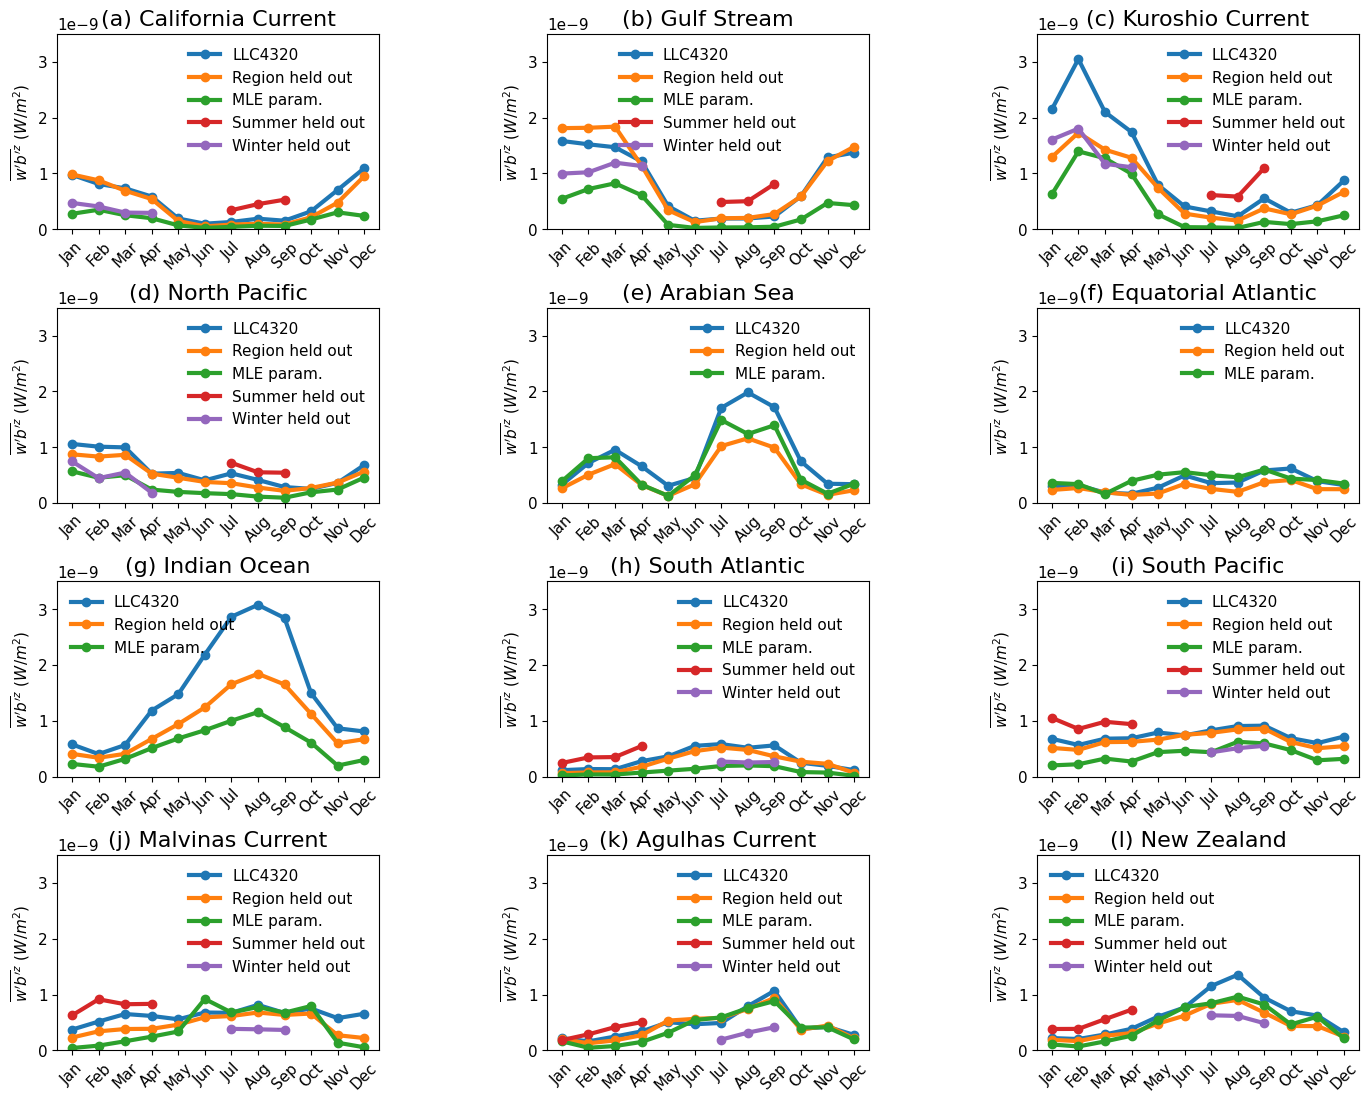

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(15,12))
plt.rcParams.update({'font.size': 11})
fig.tight_layout(pad=5.0)
abc_list = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
#label_list_plot = [label_list[i] for i in lat_ind_sorted] 
for ii in range(12):
        i_loc = lat_ind_sorted[ii]
        
        if i_loc==0 or i_loc==5 or i_loc==11:
            ax = plt.subplot(4,3,ii+1)
            my_xticks = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov','Dec',]
            plt.xticks(np.arange(0,12,1), my_xticks,rotation = 45); 
            if i_loc==0 or 3 or 6:
                plt.ylabel(r'$\overline{w^\prime b^\prime}^z\ (W/m^2)$')

            plt.plot(np.roll(WB_sg_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='LLC4320')
            plt.plot(np.roll(WB_cnn_loc_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='Region held out')
            plt.plot(np.roll(WB_param_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='MLE param.')
            plt.plot(np.roll(WB_cnn_summer_loc_time_mean[i_loc]*np.nan,-3),'o-',linewidth=3)
            plt.plot(np.roll(WB_cnn_winter_loc_time_mean[i_loc]*np.nan,-3),'o-',linewidth=3)
            

            plt.title(abc_list[ii]+' '+label_list[i_loc],fontsize=16)
            #if i_loc==0:
            #plt.ylim([0,3.5e-9])
            plt.legend(fontsize=11).get_frame().set_alpha(0)
            plt.ylim([0,3.5e-9])
        else:
            ax = plt.subplot(4,3,ii+1)
            my_xticks = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov','Dec',]
            plt.xticks(np.arange(0,12,1), my_xticks,rotation = 45); 
            if i_loc==0 or 3 or 6:
                plt.ylabel(r'$\overline{w^\prime b^\prime}^z\ (W/m^2)$')

            plt.plot(np.roll(WB_sg_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='LLC4320')
            plt.plot(np.roll(WB_cnn_loc_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='Region held out')
            plt.plot(np.roll(WB_param_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='MLE param.')
            plt.plot(np.roll(WB_cnn_summer_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='Summer held out')
            plt.plot(np.roll(WB_cnn_winter_loc_time_mean[i_loc],-3),'o-',linewidth=3,label='Winter held out')
            

            #plt.plot(np.roll(WB_param_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='Phys. Param.')
            #plt.plot(np.roll(WB_param_Lf_FK_loc_mean[i_loc],-4),'o-',linewidth=2,label='Lf FK')
            #plt.plot(np.roll(WB_param_Lf_BD_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='Lf BD')

            plt.title(abc_list[ii]+' '+label_list[i_loc],fontsize=16)
            #if i_loc==0:
            #plt.ylim([0,3.5e-9])
            plt.legend(fontsize=11).get_frame().set_alpha(0)
            plt.ylim([0,3.5e-9])
            #plt.legend().get_frame().set_alpha(0)
#plt.savefig('./figures/sensitivity_timeseries', transparent=True)


## R**2

In [63]:
r2_winter_loc = np.empty((12,1))
r2_winter_loc[:] = np.nan
#corr_winter_loc = np.empty((10,1))
#corr_winter_loc[:] = np.nan

r2_summer_loc = np.empty((12,1))
r2_summer_loc[:] = np.nan
#corr_JAS_loc = np.empty((10,1))
#corr_JAS_loc[:] = np.nan


r2_loc = np.empty((12,1))
r2_loc[:] = np.nan
#corr_loc = np.empty((10,1))
#corr_loc[:] = np.nan

r2_loc_FK = np.empty((12,1))
r2_loc_FK[:] = np.nan
#corr_loc_FK = np.empty((10,1))
#corr_loc_FK[:] = np.nan


for i_loc in range(12):
    if i_loc>0 and i_loc<5 or i_loc>5 and i_loc<11:
        print(i_loc)
        prediction_winter_loc = prediction_winter[submeso_dataset.location_ind[submeso_dataset.test_winter_ind]==i_loc]
        target_winter_loc = target_winter[submeso_dataset.location_ind[submeso_dataset.test_winter_ind]==i_loc]

        r2_winter_loc[i_loc] = 1 - mean_squared_error(prediction_winter_loc.flatten(),target_winter_loc.flatten())/baseline_mse
        #corr_JFM_loc[i_loc],_ = pearsonr(prediction_JFM_loc.flatten(),target_JFM_loc.flatten())


        prediction_summer_loc = prediction_summer[submeso_dataset.location_ind[submeso_dataset.test_summer_ind]==i_loc]
        target_summer_loc = target_summer[submeso_dataset.location_ind[submeso_dataset.test_summer_ind]==i_loc]

        r2_summer_loc[i_loc] = 1- mean_squared_error(prediction_summer_loc.flatten(),target_summer_loc.flatten())/baseline_mse
    #corr_JAS_loc[i_loc],_ = pearsonr(prediction_JAS_loc.flatten(),target_JAS_loc.flatten())
    
    
    prediction_loc = prediction[submeso_dataset.location_ind[submeso_dataset.test_ind]==i_loc]
    target_loc = target[submeso_dataset.location_ind[submeso_dataset.test_ind]==i_loc]
    
    r2_loc[i_loc] = 1- mean_squared_error(prediction_loc.flatten(),target_loc.flatten())/baseline_mse
    #corr_loc[i_loc],_ = pearsonr(prediction_loc.flatten(),target_loc.flatten())
    
    
    WB_FK_loc = WB_FK_param[submeso_dataset.location_ind[submeso_dataset.test_ind]==i_loc]
    WB_FK_Lf_FK_loc = WB_FK_param_Lf_FK[submeso_dataset.location_ind[submeso_dataset.test_ind]==i_loc]
    WB_FK_Lf_BD_loc = WB_FK_param_Lf_BD[submeso_dataset.location_ind[submeso_dataset.test_ind]==i_loc]
    
    r2_loc_FK[i_loc] = 1- mean_squared_error(WB_FK_loc.flatten(),target_loc.flatten())/baseline_mse
    #corr_loc_FK[i_loc],_ = pearsonr(WB_FK_loc.flatten(),target_loc.flatten())

1
2
3
4
6
7
8
9
10


In [ ]:
#r2_JAS_loc[1] = r2_JAS_loc[7]
#corr_JAS_loc[1] = corr_JAS_loc[7]

#r2_JFM_loc[1] = r2_JFM_loc[7]
#corr_JFM_loc[1] = corr_JFM_loc[7]

#r2_JFM_loc[7] = np. nan
#corr_JFM_loc[7] = np. nan
#r2_JAS_loc[7] = np. nan
#corr_JAS_loc[7] = np. nan

In [62]:
r2_m_loc_loc = np.empty((12,1))
r2_m_loc_loc[:] = np.nan
#corr_m_loc_loc = np.empty((10,1))
#corr_m_loc_loc[:] = np.nan

r2_m_loc_loc[0] = 1- mean_squared_error(prediction_loc_0.flatten(),target_loc_0.flatten())/baseline_mse
#corr_m_loc_loc[0],_ = pearsonr(prediction_loc_0.flatten(),target_loc_0.flatten())

r2_m_loc_loc[1] = 1- mean_squared_error(prediction_loc_1.flatten(),target_loc_1.flatten())/baseline_mse
#corr_m_loc_loc[1],_ = pearsonr(prediction_loc_1.flatten(),target_loc_1.flatten())

#r2_m_loc_loc[1] = 1- mean_squared_error(prediction_loc_7.flatten(),target_loc_7.flatten())/baseline_mse
#corr_m_loc_loc[1],_ = pearsonr(prediction_loc_7.flatten(),target_loc_7.flatten())

r2_m_loc_loc[2] = 1- mean_squared_error(prediction_loc_2.flatten(),target_loc_2.flatten())/baseline_mse
#corr_m_loc_loc[2],_ = pearsonr(prediction_loc_2.flatten(),target_loc_2.flatten())

r2_m_loc_loc[3] = 1- mean_squared_error(prediction_loc_3.flatten(),target_loc_3.flatten())/baseline_mse
#corr_m_loc_loc[3],_ = pearsonr(prediction_loc_3.flatten(),target_loc_3.flatten())

r2_m_loc_loc[4] = 1- mean_squared_error(prediction_loc_4.flatten(),target_loc_4.flatten())/baseline_mse
#corr_m_loc_loc[4],_ = pearsonr(prediction_loc_4.flatten(),target_loc_4.flatten())

r2_m_loc_loc[5] = 1- mean_squared_error(prediction_loc_5.flatten(),target_loc_5.flatten())/baseline_mse
#corr_m_loc_loc[5],_ = pearsonr(prediction_loc_5.flatten(),target_loc_5.flatten())

r2_m_loc_loc[6] = 1- mean_squared_error(prediction_loc_6.flatten(),target_loc_6.flatten())/baseline_mse
#corr_m_loc_loc[6],_ = pearsonr(prediction_loc_6.flatten(),target_loc_6.flatten())

r2_m_loc_loc[7] = 1- mean_squared_error(prediction_loc_7.flatten(),target_loc_7.flatten())/baseline_mse
#corr_m_loc_loc[7],_ = pearsonr(prediction_loc_7.flatten(),target_loc_7.flatten())

r2_m_loc_loc[8] = 1- mean_squared_error(prediction_loc_8.flatten(),target_loc_8.flatten())/baseline_mse
#corr_m_loc_loc[8],_ = pearsonr(prediction_loc_8.flatten(),target_loc_8.flatten())

r2_m_loc_loc[9] = 1- mean_squared_error(prediction_loc_9.flatten(),target_loc_9.flatten())/baseline_mse
#corr_m_loc_loc[9],_ = pearsonr(prediction_loc_9.flatten(),target_loc_9.flatten())

r2_m_loc_loc[10] = 1- mean_squared_error(prediction_loc_10.flatten(),target_loc_10.flatten())/baseline_mse

r2_m_loc_loc[11] = 1- mean_squared_error(prediction_loc_11.flatten(),target_loc_11.flatten())/baseline_mse


NameError: name 'corr_loc' is not defined

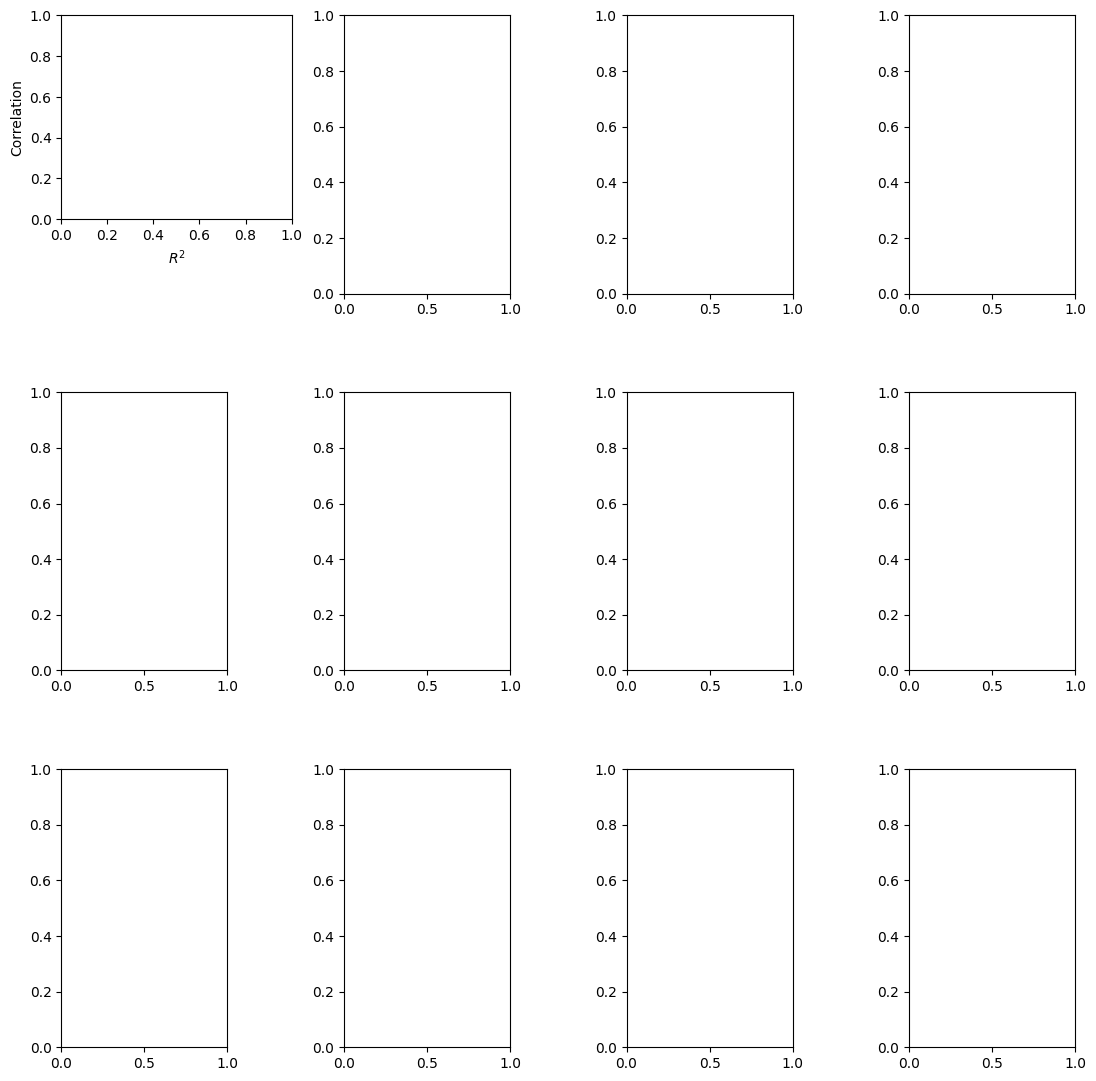

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(12,12))
fig.tight_layout(pad=5.0)

for i_loc in range(12):
    if i_loc<10:
        ax = plt.subplot(4,3,i_loc+1)
        #my_xticks = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov','Dec',]
        #plt.xticks(np.arange(0,12,1), my_xticks,rotation = 45); 
        if i_loc==0 or 3 or 6:
            plt.ylabel(r'Correlation')
            plt.xlabel(r'$R^2$')
        plt.scatter(r2_loc[i_loc], corr_loc[i_loc],s=100,c= 'k',marker='*',label='CNN')
        plt.scatter(r2_JAS_loc[i_loc], corr_JAS_loc[i_loc],s=100,marker='^',label='m JAS')
        plt.scatter(r2_JFM_loc[i_loc], corr_JFM_loc[i_loc],s=100,marker='v',label='m JFM')
        plt.scatter(r2_m_loc_loc[i_loc], corr_m_loc_loc[i_loc],s=100,alpha=0.7,label='m '+label_list[i_loc])
        plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k')
        plt.legend(loc='lower left')
        #plt.plot(np.roll(WB_cnn_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='CNN')
        #plt.plot(np.roll(WB_param_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='Param')
        
        plt.title(label_list[i_loc])
        #if i_loc==0:
        plt.ylim([0,1])
        plt.xlim([0,1])
        #plt.legend()
        #corr_loc[i_loc]
    else:
        ax = plt.subplot(4,3,i_loc+1)
        #my_xticks = ['Sep', 'Oct','Nov','Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov']
        #plt.xticks(np.arange(0,100,100/15), my_xticks,rotation = 45);               
        WB_sg_loc_mean_plot = np.nan
        WB_cnn_loc_mean_plot = np.nan
        WB_param_loc_mean_plot = np.nan

        #plt.ylabel(r'$\overline{wb}^z\ (W/m^2)$')
        plt.title(label_list[i_loc])
        #if i_loc==0:
        #plt.ylim([0,5e-9])
        plt.ylabel(r'Correlation')
        plt.xlabel(r'$R^2$')
        plt.ylim([0,1])
        plt.xlim([0,1])
        plt.legend()
        #clust_data = [[1,1],[1,1]]
        #collabel=("Corr", r"$R^2$")
    #ax.axis('tight')
    #ax.axis('off')
      #  the_table = ax.table(cellText=clust_data,loc='center')

        #corr_loc[i_loc]
        

plt.savefig('./figures/corr_r2_seasonality_location_combined', transparent=True)


In [64]:
# sort by latitude

lat_rad = np.empty(12)
PATH_LIST = glob.glob(BASE+'*_smooth/preprcossed_data/lat.nc')
i_lat_path = 0

for i_lat in range(12):
    #if i_lat == 1 or i_lat ==10 or i_lat ==11:
    #    lat_rad[i_lat] = np.NaN
    #else:
    #    print(i_lat_path)
        lat_rad[i_lat] = xr.open_dataarray(PATH_LIST[i_lat]).values.mean()
    #    i_lat_path = i_lat_path+1
    
    
lat_rad_sorted = np.sort(lat_rad)[::-1]
lat_ind_sorted = np.argsort(lat_rad)[::-1]
lat_ind_sorted_nse = lat_ind_sorted[[0,1,2,3,7,8,9,10,11,4,5,6]]

In [65]:
lat_ind_sorted_nse

array([10,  6,  3,  4,  7,  9,  8,  1,  2,  0,  5, 11])

In [4]:
#label_list_plot = ['Arabian Sea','Malvinas Current', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
#              'Gulf Stream', 'South Atlantic', 'Agulhas Current', 'South Pacific', 'Indian Ocean' ]

label_list_plot = ['Arabian Sea','Agulhas Current', 'New Zealand', 'Kuroshio Extension', 'North Pacific', 'Equatorial Atlantic',
              'Gulf Stream', 'South Atlantic', 'Malvinas Current', 'South Pacific','California Current', 'Indian Ocean', ]

#r2_summer_loc[[0,5,11]]= np.nan
#r2_winter_loc[[0,5,11]]= np.nan

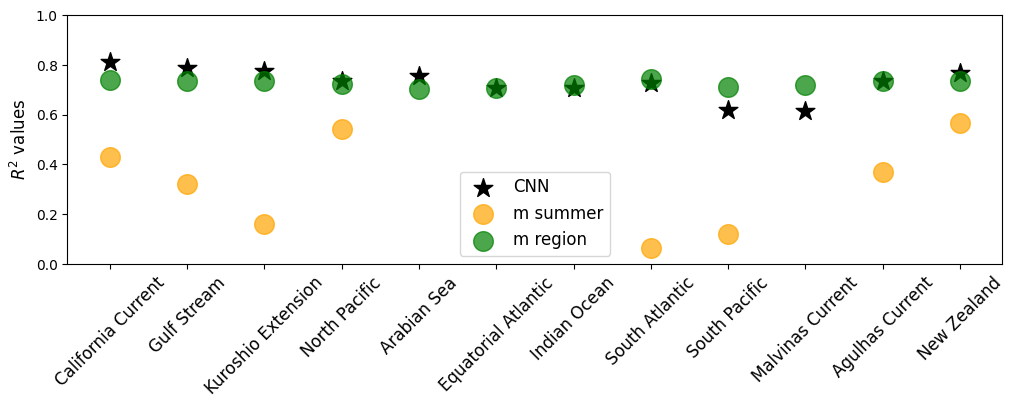

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
fig.tight_layout(pad=8.0)


plt.scatter(range(12),r2_loc[lat_ind_sorted],s=200,c= 'k',marker='*',label='CNN')
#plt.scatter(range(12),r2_loc_FK[lat_ind_sorted],s=200,c='gray',marker='s',alpha=0.7,label='param')
#plt.scatter(range(12),r2_winter_loc[lat_ind_sorted],s=200,c='blue',alpha=0.7,marker='o',label='m winter')
plt.scatter(range(12),r2_summer_loc[lat_ind_sorted],s=200,c='orange',alpha=0.7,marker='o',label='m summer')
plt.scatter(range(12),r2_m_loc_loc[lat_ind_sorted],s=200,c='green',alpha=0.7,label='m region')
#plt.xticks(np.arange(len(label_list)), label_list[lat_ind_sorted],rotation = 45, fontsize=12);
my_xticks = [label_list_plot[i] for i in lat_ind_sorted] 
plt.xticks(np.arange(len(label_list_plot)), my_xticks,rotation = 45,fontsize=12);
plt.ylabel('$R^2$ values', fontsize=12)
plt.ylim([0,1])
plt.legend(fontsize=12,loc='lower center')

plt.savefig('./figures/r2_seasonality_location_lat_sorted', transparent=True)



In [ ]:
label_list[lat_ind_sorted]

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,12))
fig.tight_layout(pad=5.0)



for i_loc in range(12):
    if i_loc<10:
        ax = plt.subplot(4,3,i_loc+1)
        #my_xticks = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov','Dec',]
        #plt.xticks(np.arange(0,12,1), my_xticks,rotation = 45); 
        if i_loc==0 or 3 or 6:
            plt.ylabel(r'Correlation')
            plt.xlabel(r'$R^2$')
        plt.scatter(r2_loc[i_loc], corr_loc[i_loc],s=100,c= 'k',marker='*',label='CNN')
        plt.scatter(r2_JAS_loc[i_loc], corr_JAS_loc[i_loc],s=100,marker='^',label='m JAS')
        plt.scatter(r2_JFM_loc[i_loc], corr_JFM_loc[i_loc],s=100,marker='v',label='m JFM')
        plt.scatter(r2_m_loc_loc[i_loc], corr_m_loc_loc[i_loc],s=100,alpha=0.7,label='m '+label_list[i_loc])
        plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'k')
        plt.legend(loc='lower left')
        #plt.plot(np.roll(WB_cnn_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='CNN')
        #plt.plot(np.roll(WB_param_loc_time_mean[i_loc],-4),'o-',linewidth=2,label='Param')
        
        plt.title(label_list[i_loc])
        #if i_loc==0:
        plt.ylim([0,1])
        plt.xlim([0,1])
        #plt.legend()
        #corr_loc[i_loc]
    else:
        ax = plt.subplot(4,3,i_loc+1)
        #my_xticks = ['Sep', 'Oct','Nov','Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep', 'Oct','Nov']
        #plt.xticks(np.arange(0,100,100/15), my_xticks,rotation = 45);               
        WB_sg_loc_mean_plot = np.nan
        WB_cnn_loc_mean_plot = np.nan
        WB_param_loc_mean_plot = np.nan

        #plt.ylabel(r'$\overline{wb}^z\ (W/m^2)$')
        plt.title(label_list[i_loc])
        #if i_loc==0:
        #plt.ylim([0,5e-9])
        plt.ylabel(r'Correlation')
        plt.xlabel(r'$R^2$')
        plt.ylim([0,1])
        plt.xlim([0,1])
        plt.legend()
        #clust_data = [[1,1],[1,1]]
        #collabel=("Corr", r"$R^2$")
    #ax.axis('tight')
    #ax.axis('off')
      #  the_table = ax.table(cellText=clust_data,loc='center')

        #corr_loc[i_loc]
        

plt.savefig('./figures/corr_r2_seasonality_location_combined', transparent=True)
